TENSORES

In [1]:
import torch
import numpy as np

In [2]:
lista = [
    [1,2,3],
    [4,5,6],
]

In [3]:
tensor = torch.Tensor(lista)
tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [4]:
arr = np.random.rand(3,4)
tensor = torch.from_numpy(arr)
tensor

tensor([[0.1091, 0.9434, 0.9879, 0.1490],
        [0.1888, 0.8925, 0.0817, 0.7466],
        [0.8318, 0.5893, 0.6666, 0.9107]], dtype=torch.float64)

In [5]:
t1 = torch.ones(2,2)
t2 = torch.zeros(3,2)
t3 = torch.randn(3,3)

print(t1)
print(t2)
print(t3)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[ 0.4847,  0.8956, -0.5227],
        [-0.0899,  2.8903, -0.3551],
        [-0.8355, -0.8882,  0.3963]])


In [6]:
t1[0,0]=3
t1

tensor([[3., 1.],
        [1., 1.]])

In [7]:
t1[:,1]

tensor([1., 1.])

In [8]:
t4 = [
    [1,2],
    [3,4]
]
t4 = torch.from_numpy(np.array(t4))

t5 = torch.ones(2,2)

t6=t4+t5
t6

tensor([[2., 3.],
        [4., 5.]])

In [9]:
print(t6.size())
print(t6.view(-1))
print(t6.view(4,1))

torch.Size([2, 2])
tensor([2., 3., 4., 5.])
tensor([[2.],
        [3.],
        [4.],
        [5.]])


DEVICE

In [10]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

PERCEPTRON

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plotline(a,b,c):
    x=np.linspace(-2,4,50)
    y=(-a*x-c)/b

    plt.axvline(0,-1,1,color='k')
    plt.axhline(0,-1,1,color='k')
    plt.plot(x,y)
    plt.grid(True)

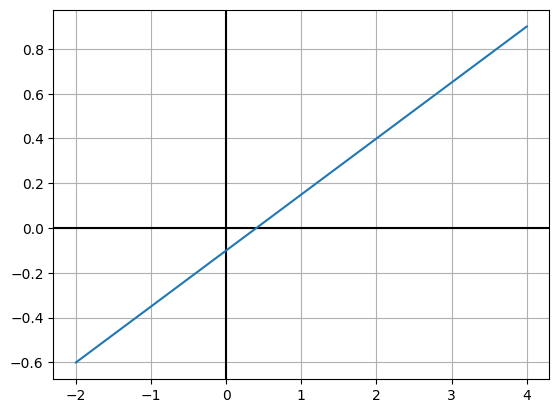

In [13]:
a=-1
b=4
c=0.4

plotline(a,b,c)

0.0


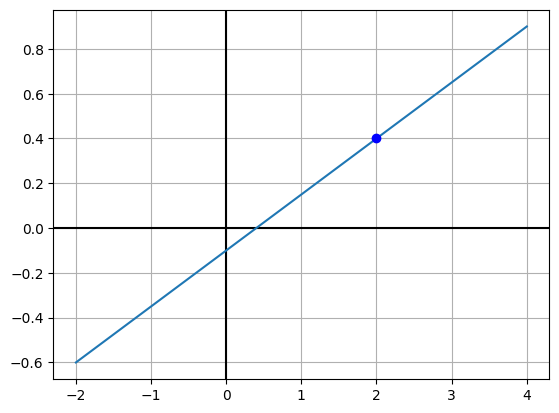

In [14]:
p1 = (2,0.4)
ret1 = a*p1[0] + b*p1[1] + c
print(round(ret1,2))
plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')

1.6


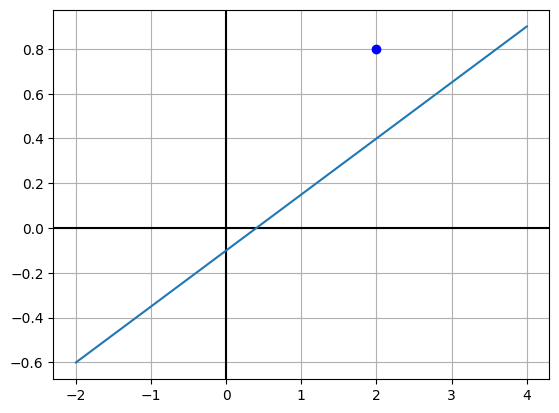

In [15]:
p = (2,0.8)
ret = a*p[0] + b*p[1] + c
print(round(ret,2))
plotline(a,b,c)
plt.plot(p[0], p[1], color='b', marker='o')

# SEPARAR DADOS

In [16]:
from sklearn.datasets import make_classification

In [31]:
x,y = make_classification(n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)

In [26]:
def plotmodel(a,b,c,xmin,xmax):
    x=np.linspace(xmin,xmax,50)
    y=(-a*x-c)/b

    plt.plot(x,y)
    plt.grid(True)

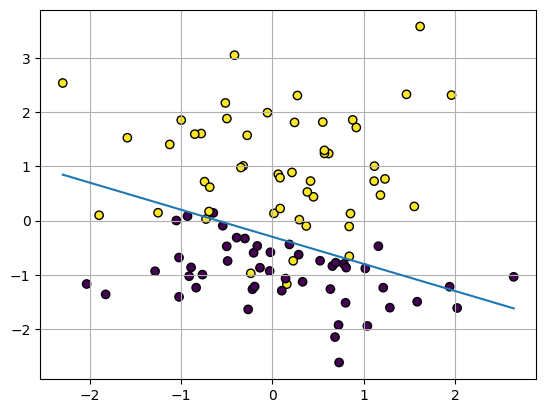

In [42]:
plt.scatter(x[:,0], x[:,1], marker='o', c=y, edgecolors='k')
plotmodel(
    -0.25,
    -0.5,
    -0.15,
    min(x[:,0]), 
    max(x[:,0])
)

In [57]:
def classificar(a,b,c,xmin,xmax, pt):
    x=np.linspace(xmin,xmax,50)
    y=(-a*x-c)/b

    plt.plot(x,y)
    plt.scatter(pt[1], pt[0], color='r', marker='o', edgecolors='k')
    plt.grid(True)
    ret = a*pt[1] + b*pt[0] + c
    print(ret)

-0.35


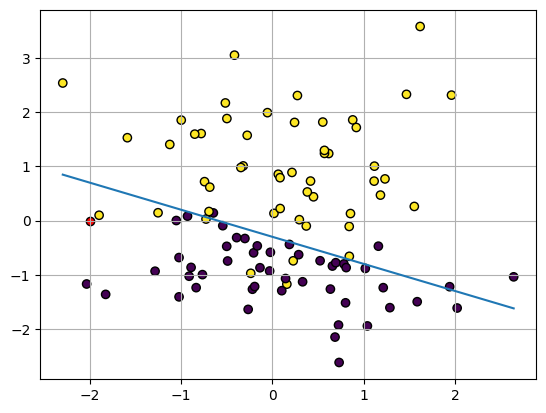

In [66]:
plt.scatter(x[:,0], x[:,1], marker='o', c=y, edgecolors='k')
pt = (0,-2)
classificar(
    0.25,
    0.5,
    0.15,
    min(x[:,0]), 
    max(x[:,0]),
    pt
)

# PERCEPTRON

In [74]:
from torch import nn
from mpl_toolkits.mplot3d import Axes3D

In [70]:
perceptron = nn.Linear(
    in_features=3,
    out_features=1
)

In [73]:
for name in perceptron.named_parameters():
    print(name)

('weight', Parameter containing:
tensor([[ 0.4362, -0.4477, -0.1341]], requires_grad=True))
('bias', Parameter containing:
tensor([0.2894], requires_grad=True))


In [97]:
def plot3d(perceptron, point=None):
    # Obter pesos e bias corretamente
    w1, w2, w3 = perceptron.weight.detach().numpy().flatten()
    b = perceptron.bias.detach().numpy()

    # Definir intervalo para x1 e x2
    x1 = np.linspace(-1, 1, 10)
    x2 = np.linspace(-1, 1, 10)
    x1, x2 = np.meshgrid(x1, x2)

    # Prevenir divisão por zero
    if w3 == 0:
        print("Erro: w3 é zero, não é possível calcular x3.")
        return

    # Calcular x3 com a equação do plano
    x3 = (-b - w1*x1 - w2*x2) / w3

    # Criar a figura e eixo 3D corretamente
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=90)

    # Plotar a superfície
    ax.plot_surface(x1, x2, x3, cmap='viridis', alpha=0.7)

    # Rótulos dos eixos
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Plano Separador do Perceptron')

    # Se um ponto foi passado, plote-o no gráfico
    if point is not None:
        x1, x2, x3 = point
        ax.scatter(x1, x2, x3, color='red', s=100, label="Ponto")
        ax.legend()

    # Exibir o gráfico
    plt.show()

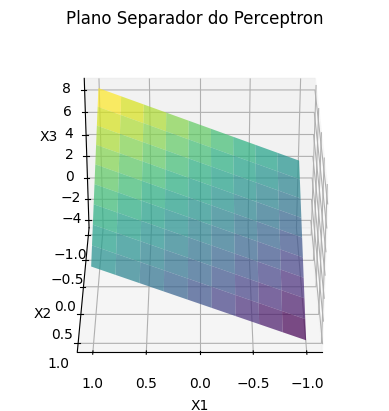

In [98]:
plot3d(perceptron)

tensor([-0.6043], grad_fn=<ViewBackward0>)


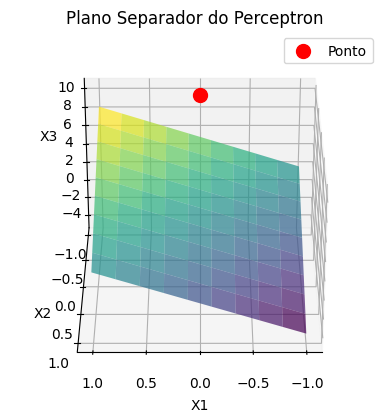

In [101]:
# Criando um tensor de entrada
x = torch.Tensor([0, -1,10])  # Mantém formato correto

# Calcula a saída do perceptron
y = perceptron(x)
print(y)

# Convertendo para numpy
x_numpy = x.numpy()

# Chamando a função e passando o ponto para ser plotado
plot3d(perceptron, x_numpy)

# ATIVACOES

## 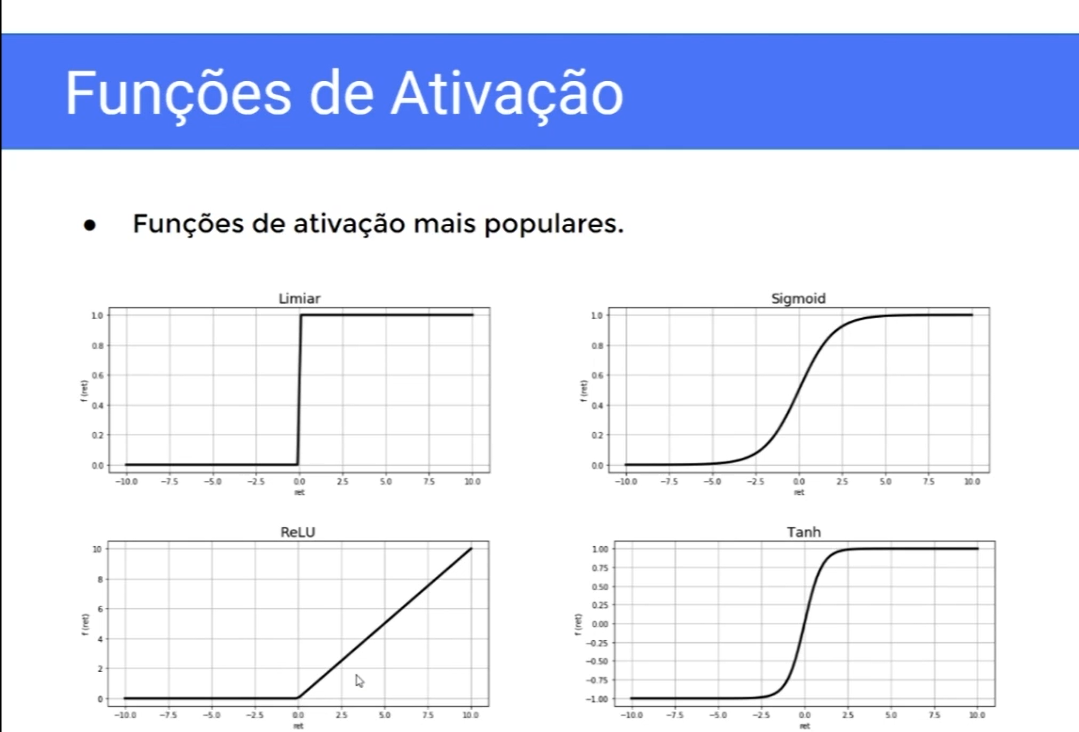

In [131]:
perceptron = nn.Linear(
    in_features=2,
    out_features=1
)
perceptron.weight = nn.Parameter(
    torch.Tensor([[0, 1]])
)
perceptron.bias = nn.Parameter(
    torch.Tensor([0])
)

In [136]:
activation = nn.Tanh()
# activation = nn.Sigmoid()

In [137]:
np.random.seed(11)
torch.manual_seed(11)

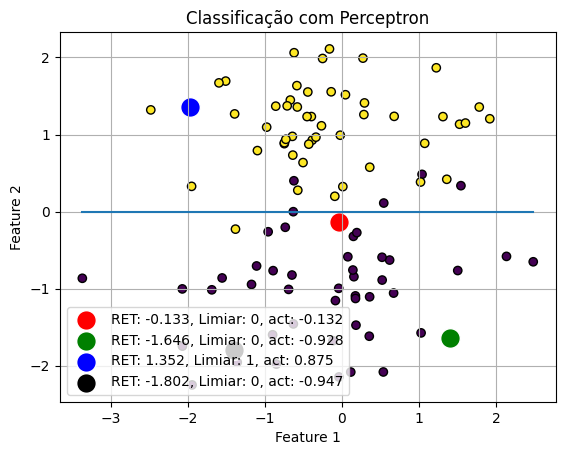

In [139]:
x,y = make_classification(n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1, random_state=14)

plt.scatter(x[:,0], x[:,1], marker='o', c=y, edgecolors='k')
plotmodel(
    0,
    1,
    0,
    min(x[:,0]), 
    max(x[:,0])
)
colors = ['r', 'g', 'b', 'k']


for k, idx in enumerate([17, 18, 19, 20]):
    x_ = torch.tensor(x[idx], dtype=torch.float)  # Manter 2 features corretamente
    
    ret = perceptron(x_)
    act = activation(ret)

    act_lin = 0 if ret.item() < 0 else 1
    label = f'RET: {ret.item():.3f}, Limiar: {act_lin}, act: {act.item():.3f}'

    plt.scatter(x_[0].item(), x_[1].item(), color=colors[k], label=label, edgecolors='w', s=200)

plt.legend()
plt.title("Classificação com Perceptron")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# MULTIPLOS PERCEPTRONS

In [142]:
from sklearn.datasets import make_moons

In [143]:
# Gerar dados com 300 amostras e adicionar ruído
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

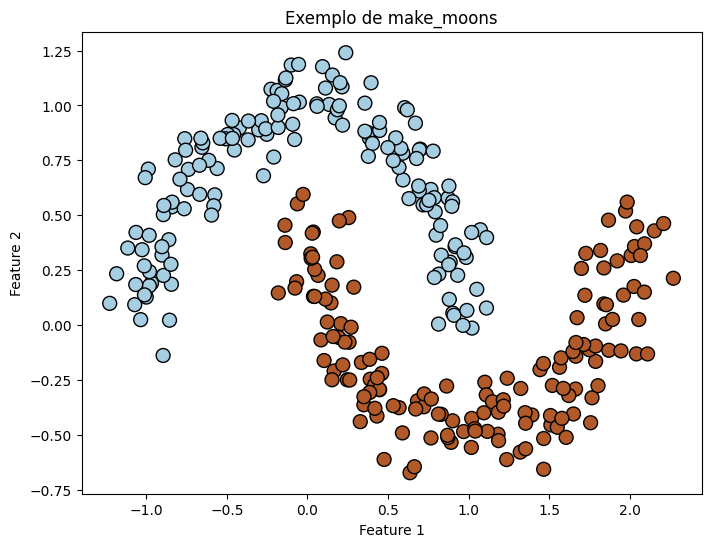

In [144]:
# Plotar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=100)
plt.title("Exemplo de make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [147]:
from torchsummary import summary

In [148]:
camadas = []
input_size=2
hidden_size=8
output_size=1

#hidden
c = nn.Linear(
    in_features=input_size,
    out_features=hidden_size
)
camadas.append(c)

#ativacao nao linear
c = nn.ReLU()
camadas.append(c)

#output
c = nn.Linear(
    in_features=hidden_size,
    out_features=output_size
)
camadas.append(c)

#rede
net = nn.Sequential(
    *camadas
)
net

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [150]:
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [165]:
entrada = torch.Tensor(X.tolist())
pred = net(entrada)
pred

tensor([[0.2449],
        [0.1576],
        [0.2266],
        [0.2140],
        [0.2102],
        [0.2213],
        [0.2646],
        [0.1673],
        [0.2198],
        [0.2700],
        [0.2033],
        [0.2181],
        [0.2255],
        [0.2076],
        [0.2649],
        [0.2228],
        [0.1465],
        [0.2423],
        [0.2386],
        [0.2540],
        [0.1616],
        [0.1659],
        [0.1906],
        [0.1925],
        [0.1363],
        [0.2171],
        [0.1629],
        [0.1347],
        [0.2511],
        [0.1921],
        [0.1986],
        [0.2485],
        [0.2063],
        [0.2164],
        [0.2416],
        [0.1640],
        [0.2147],
        [0.1394],
        [0.2050],
        [0.1396],
        [0.1596],
        [0.1435],
        [0.1546],
        [0.1893],
        [0.1585],
        [0.1934],
        [0.2102],
        [0.2138],
        [0.1476],
        [0.2148],
        [0.2707],
        [0.2049],
        [0.2078],
        [0.1723],
        [0.1407],
        [0

# MODULE

In [185]:
class MinhaRede(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()
        
        #definir arquitetura da rede
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        hidden = self.relu(self.hidden(x))
        output = self.output(hidden)
        return output

In [186]:
input_size=2
hidden_size=8
output_size=1
net = MinhaRede(input_size,hidden_size,output_size)
net

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [191]:
entrada = torch.Tensor(X.tolist())
pred = net.forward(entrada)
pred


tensor([[-0.2758],
        [-0.4077],
        [-0.3385],
        [-0.3207],
        [-0.3033],
        [-0.2926],
        [-0.2672],
        [-0.3499],
        [-0.3022],
        [-0.2746],
        [-0.3269],
        [-0.3340],
        [-0.2898],
        [-0.3769],
        [-0.2769],
        [-0.2920],
        [-0.4127],
        [-0.2776],
        [-0.4123],
        [-0.2875],
        [-0.3046],
        [-0.3688],
        [-0.3390],
        [-0.3406],
        [-0.3539],
        [-0.3617],
        [-0.3939],
        [-0.4310],
        [-0.2969],
        [-0.3477],
        [-0.3430],
        [-0.3014],
        [-0.3507],
        [-0.3192],
        [-0.2780],
        [-0.3680],
        [-0.3075],
        [-0.3102],
        [-0.3636],
        [-0.2979],
        [-0.3407],
        [-0.2978],
        [-0.4058],
        [-0.3083],
        [-0.3251],
        [-0.3261],
        [-0.3025],
        [-0.3051],
        [-0.3506],
        [-0.2974],
        [-0.2719],
        [-0.4177],
        [-0.

In [160]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [161]:
input_size=2
hidden_size=8
output_size=1
net = MinhaRede(input_size,hidden_size,output_size)
net = net.to(device)

In [171]:
entrada = torch.Tensor(X.tolist())
net.forward(entrada.to(device))

tensor([[0.2449],
        [0.1576],
        [0.2266],
        [0.2140],
        [0.2102],
        [0.2213],
        [0.2646],
        [0.1673],
        [0.2198],
        [0.2700],
        [0.2033],
        [0.2181],
        [0.2255],
        [0.2076],
        [0.2649],
        [0.2228],
        [0.1465],
        [0.2423],
        [0.2386],
        [0.2540],
        [0.1616],
        [0.1659],
        [0.1906],
        [0.1925],
        [0.1363],
        [0.2171],
        [0.1629],
        [0.1347],
        [0.2511],
        [0.1921],
        [0.1986],
        [0.2485],
        [0.2063],
        [0.2164],
        [0.2416],
        [0.1640],
        [0.2147],
        [0.1394],
        [0.2050],
        [0.1396],
        [0.1596],
        [0.1435],
        [0.1546],
        [0.1893],
        [0.1585],
        [0.1934],
        [0.2102],
        [0.2138],
        [0.1476],
        [0.2148],
        [0.2707],
        [0.2049],
        [0.2078],
        [0.1723],
        [0.1407],
        [0